# data overview

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bank_full_df = pd.read_csv(r"C:\Users\nguye\git\ML project\Original\ML-miniproject\bank-full.csv", encoding = "Latin-1")
bank_full_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [69]:
bank_full_df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

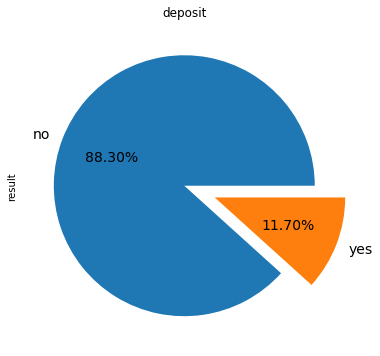

In [143]:
data = bank_full_df.y.value_counts()
data.plot.pie(figsize=(10,6), label = 'result', fontsize = 14, autopct='%1.2f%%', title = 'deposit', explode=[0,0.25])

>the class label is highly imbalance, over will balance it by undersampling

In [71]:
from sklearn.utils import shuffle

In [72]:
# from domain specific knowledge, we balance data by taking 11162 examples and keep all the 'yes' class label
bank_yes = bank_full_df.loc[bank_full_df.y == 'yes']
bank_no = bank_full_df.loc[bank_full_df.y == 'no'].sample(n = 11162 - 5289)
new_df = shuffle(pd.concat([bank_yes, bank_no])).reset_index(drop = 1)
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,28,technician,single,tertiary,no,426,no,no,cellular,18,may,11,4,355,1,other,no
1,35,student,single,secondary,no,188,yes,no,cellular,5,may,863,1,78,8,success,yes
2,53,management,married,tertiary,no,1061,no,no,cellular,8,jun,139,2,-1,0,unknown,no
3,46,blue-collar,married,primary,no,804,yes,no,cellular,12,may,1063,2,361,1,success,yes
4,39,housemaid,single,secondary,no,2022,no,no,unknown,6,jun,105,1,-1,0,unknown,no


In [73]:
new_df.y.value_counts()

no     5873
yes    5289
Name: y, dtype: int64

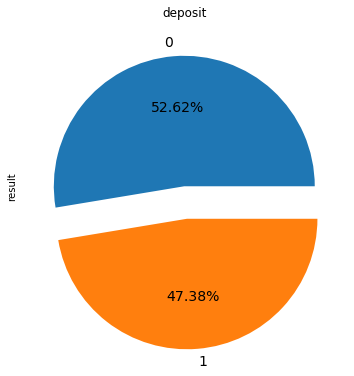

In [144]:
data = new_df.y.value_counts()
data.plot.pie(figsize=(10,6), label = 'result', fontsize = 14, autopct='%1.2f%%', title = 'deposit', explode=[0,0.25])

In [75]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  y          11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# attributes: categorical and numerical overview

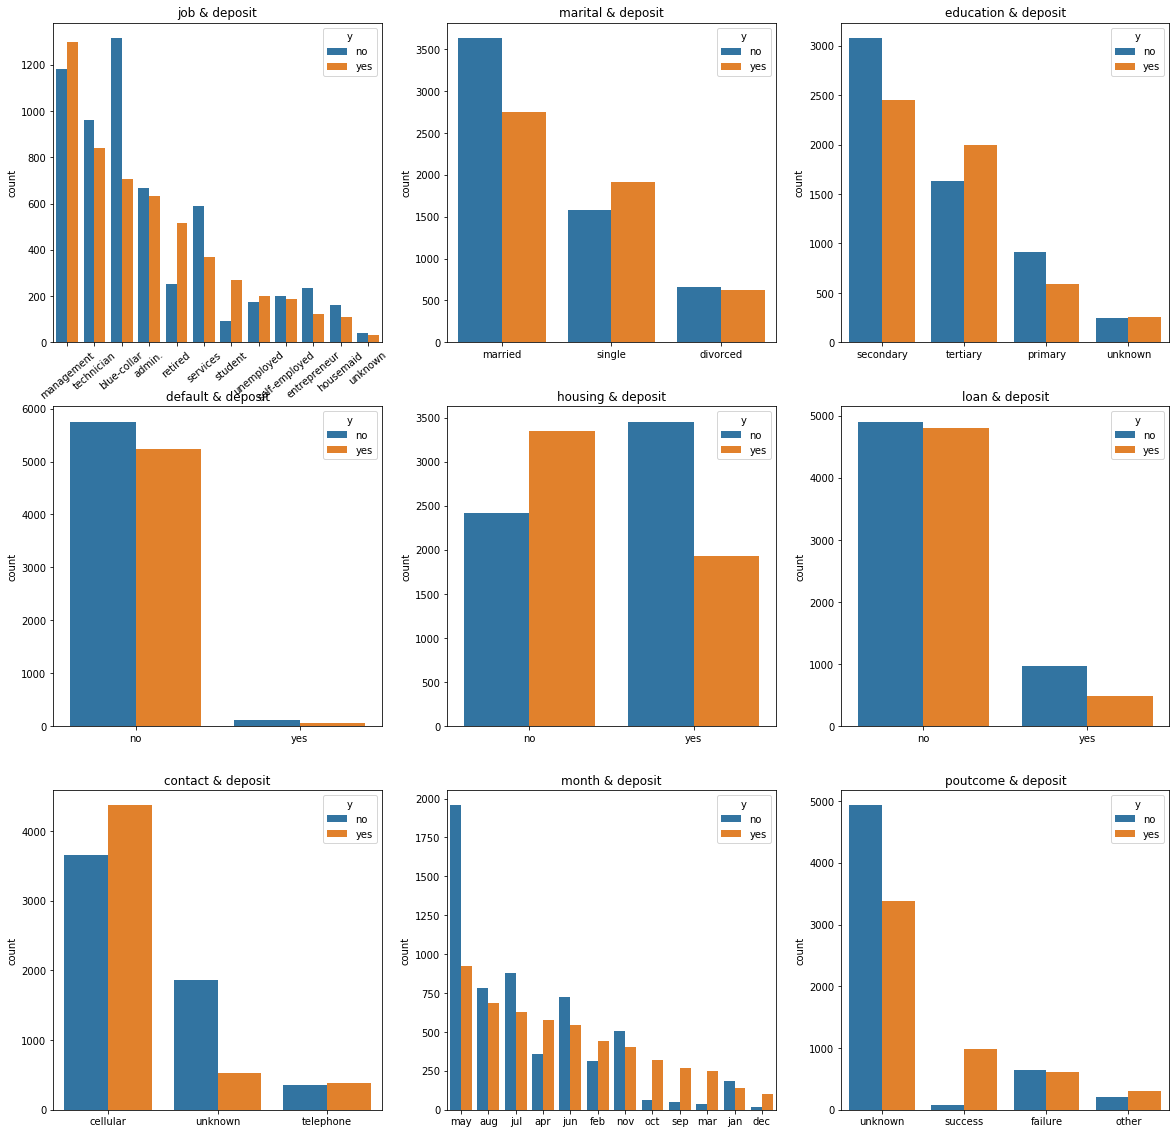

In [76]:
# categorical attributes
categories = ['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
fig, ax = plt.subplots(figsize = (20,20), ncols=3, nrows = 3)
count =0
for col in categories:
    g=sns.countplot(x = col, data = new_df, hue = 'y', order = bank_yes[col].value_counts().index, ax = ax[count//3, count%3])
    g.set_title(col+' & deposit')
    g.set_xlabel(None,fontsize = 9)
    if col == 'job':
        plt.setp(g.get_xticklabels(), rotation=40)
    count+=1

> here we see job, education, contact and poutcome have unkown/missing values
> with job, education, contact we impute missing values by apply most-frequent strategy
> with poutcome since unkown values appears more than 80%, we consider dropping it
> other categorical attribute will be convert into numerical by number 1, 2, 3, ...

In [77]:
new_df.age.to_numpy()

array([28, 35, 53, ..., 37, 28, 38], dtype=int64)

In [78]:
numerical = ['age', 'balance', 'day', 'duration', 'previous', 'pdays', 'campaign']
outlier = {}
for col in numerical:
    outlier[col] = []
    data = new_df[col].to_numpy()
    mean = new_df[col].mean()
    std = new_df[col].std()
    count_ouliers = 0
    for i in range(len(data)):
        z = (data[i]-mean)/std
        if z >3 or z<-3:
            count_ouliers+=1
            outlier[col].append(i)
    print(col+': ', count_ouliers)
outlier_age = outlier['age']
outlier_balance = outlier['balance']
outlier_duration = outlier['duration']
outlier_previous = outlier['previous']
outlier_campaign = outlier['campaign']
a=list(set(outlier_balance+outlier_campaign+outlier_previous))
len(a)

age:  128
balance:  181
day:  0
duration:  199
previous:  210
pdays:  168
campaign:  203


585

count    11162.000000
mean        41.222182
std         11.893063
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64 

count    11162.000000
mean      1528.836678
std       3125.143416
min      -3058.000000
25%        122.000000
50%        554.000000
75%       1717.750000
max      81204.000000
Name: balance, dtype: float64 

count    11162.000000
mean        15.470794
std          8.384502
min          1.000000
25%          8.000000
50%         15.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64 

count    11162.000000
mean       371.695126
std        346.483909
min          0.000000
25%        139.000000
50%        253.000000
75%        494.000000
max       3881.000000
Name: duration, dtype: float64 

count    11162.000000
mean         0.814639
std          2.185130
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         58.000000

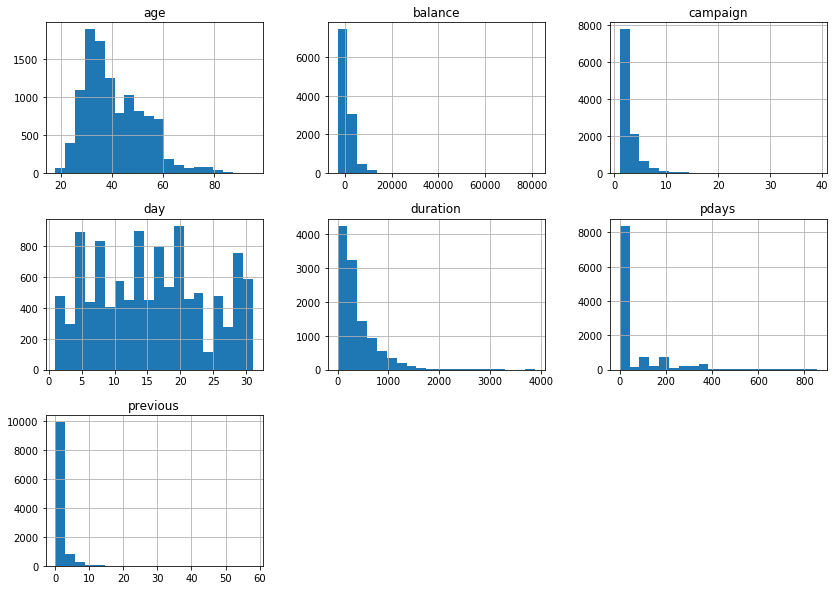

In [79]:
# numerical attributes
for col in numerical:
    print(new_df[col].describe(),"\n")
new_df.drop(columns='y').hist(bins = 20, figsize=(14,10))
plt.show()

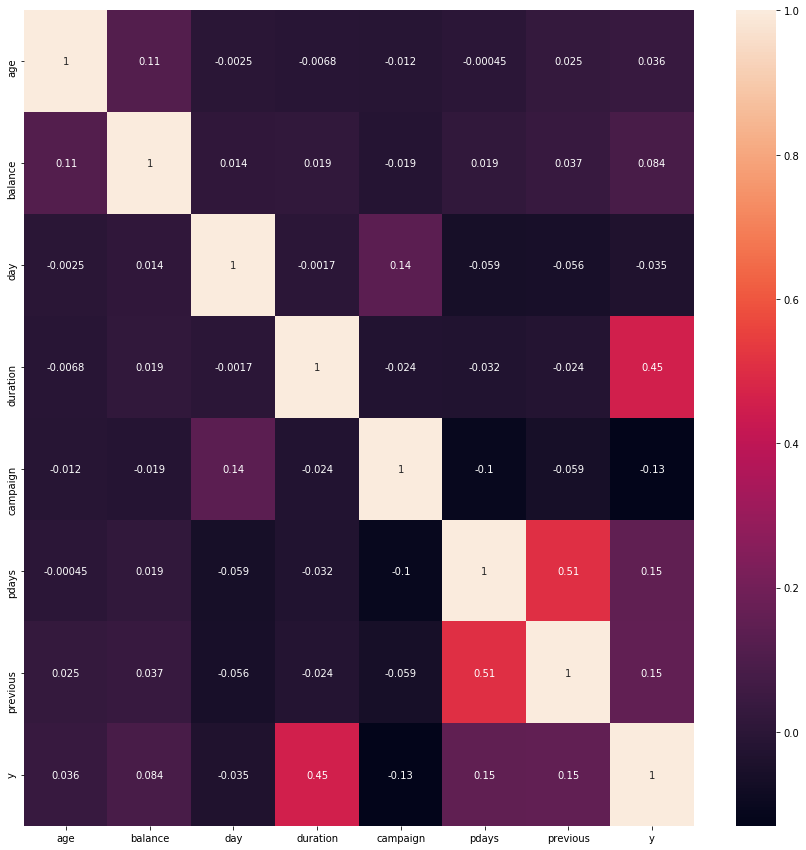

In [80]:
def tran_y(x):
    if x == 'yes':
        return 1
    if x == 'no':
        return 0
    else:
        return x
new_df.y = new_df.y.apply(tran_y)
plt.subplots(figsize = (15,15))
sns.heatmap(data = new_df.corr(), annot=True)

>pdays and poutcome do not correlate to the outcome much so we can drop those attributes

# imputing missing values

In [81]:
from sklearn.impute import SimpleImputer
imputer_mode = SimpleImputer(missing_values= 'unknown', strategy= 'most_frequent')

# categorical data transformation

In [82]:
def tran_job(x):
  if x == 'housemaid':
    return 1
  if x == 'entrepreneur':
    return 2
  if x == 'self-employed':
    return 3
  if x == 'unemployed':
    return 4
  if x == 'student':
    return 5
  if x == 'services':
    return 6
  if x == 'retired':
    return 7
  if x == 'admin.':
    return 8
  if x == 'blue-collar':
    return 9
  if x == 'technician':
    return 10
  if x == 'management':
    return 11
  else:
    return x
def tran_marital(x):
  if x == 'married':
    return 3
  if x == 'single':
    return 2
  if x == 'divorced':
    return 1
  else:
    return x
def tran_education(x):
  if x == 'secondary':
    return 3
  if x == 'tertiary':
    return 2
  if x == 'primary':
    return 1
  else:
    return x
def tran_binary_no(x):
  if x == 'no':
    return 1
  if x =='yes':
    return 0
  else:
    return x
def tran_contact(x):
    if x == 'cellular':
        return 1
    if x == 'telephone':
        return 0
    else:
        return x
def tran_month(x):
    if x == 'dec':
        return 1
    if x == 'jan':
        return 2
    if x == 'mar':
        return 3
    if x == 'sep':
        return 4
    if x == 'oct':
        return 5
    if x == 'nov':
        return 6
    if x == 'feb':
        return 7
    if x == 'jun':
        return 8
    if x == 'apr':
        return 9
    if x == 'jul':
        return 10
    if x == 'aug':
        return 11
    if x == 'may':
        return 12
def tran_y(x):
    if x == 'yes':
        return 1
    if x == 'no':
        return 0
    else:
        return x

# group age, duration and remove outliers from balance, campaign, previous

In [83]:
def duration_group( x):
    if x <=102:
        return 1
    elif x<=180:
        return 2
    elif x <=319:
        return 3
    elif x<=644.5:
        return 4
    else:
        return 5
def age_group(x):
    if x <=32:
        return 1
    elif x <= 47:
        return 2
    elif x <= 70:
        return 3
    else:
        return 4
def remove_outliers(data):
    new = data.copy()
    numerical = ['balance', 'previous', 'campaign']
    outlier = {}
    for col in numerical:
        outlier[col] = []
        data = new_df[col].to_numpy()
        mean = new_df[col].mean()
        std = new_df[col].std()
        count_ouliers = 0
        for i in range(len(data)):
            z = (data[i]-mean)/std
            if z >3 or z<-3:
                count_ouliers+=1
                outlier[col].append(i)
    o = list(set(outlier['balance']+outlier['previous']+outlier['campaign']))
    new.drop(new.index[o], inplace = True)
    return new
    

# transform the dataset and normalize data

In [84]:
from sklearn.preprocessing import StandardScaler
def preprocessing(dataframe):
    copy_df = dataframe.copy()
    columns = copy_df.columns
    imputer_mode = SimpleImputer(missing_values= 'unknown', strategy= 'most_frequent')
    copy_df = imputer_mode.fit_transform(copy_df)
    copy_df = pd.DataFrame(copy_df, columns = columns)
    copy_df.job = copy_df.job.apply(tran_job)
    copy_df.marital = copy_df.marital.apply(tran_marital)
    copy_df.education = copy_df.education.apply(tran_education)
    copy_df.default = copy_df.default.apply(tran_binary_no)
    copy_df.housing = copy_df.housing.apply(tran_binary_no)
    copy_df.loan = copy_df.loan.apply(tran_binary_no)
    copy_df.contact = copy_df.contact.apply(tran_contact)
    copy_df.month = copy_df.month.apply(tran_month)
    copy_df = copy_df.drop(columns = ['poutcome', 'pdays'])
    copy_df.age = copy_df.age.apply(age_group)
    copy_df.duration = copy_df.duration.apply(duration_group)
    copy_df.y = copy_df.y.apply(tran_y)
    copy_df = remove_outliers(copy_df).reset_index(drop = 1)
    
    feature = []
    for i in columns:
        if i not in ['y', 'poutcome', 'pdays']:
            feature.append(i)
    scaler = StandardScaler()
    X = scaler.fit_transform(copy_df.drop(columns = 'y'))
    y = copy_df.y
    X = pd.DataFrame(X, columns = feature);
    copy_df = pd.concat([X, y], axis= 1)
    
    return copy_df

In [121]:
input = preprocessing(bank_full_df)
input.to_csv(r'bank_encoded.csv', index = False, header=True)
input.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,1.304196,1.038375,0.740629,-0.545735,0.134849,0.255437,-0.899113,0.437121,0.263922,-1.299792,0.974767,0.347957,-0.570794,-0.253692,0
1,-0.047525,-2.314090,0.740629,0.811713,0.134849,-0.446562,-0.899113,-2.287696,0.263922,-1.299792,0.974767,-1.272066,-0.570794,-0.253692,0
2,-0.047525,0.293383,0.740629,0.811713,0.134849,0.046575,-0.899113,0.437121,0.263922,-1.299792,0.974767,-1.272066,-0.570794,-0.253692,0
3,-0.047525,0.293383,-0.702470,0.811713,0.134849,-0.446890,1.112207,0.437121,0.263922,-1.299792,0.974767,0.347957,-0.570794,-0.253692,0
4,-0.047525,1.038375,0.740629,-0.545735,0.134849,-0.371477,-0.899113,0.437121,0.263922,-1.299792,0.974767,-0.462055,-0.570794,-0.253692,0


# spliting the dataset into train and test set in a stratified way to preserve the distribution of data

In [87]:
from sklearn.model_selection import StratifiedShuffleSplit

# Here we split the data into training and test sets and implement a stratified shuffle split.

input_df = pd.read_csv(r"C:\Users\nguye\git\ML project\Original\ML-miniproject\encoded_data.csv", encoding = "Latin-1")
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
X = input_df.drop(columns='y')
y = input_df.y

for train_set, test_set in stratified.split(X, X["loan"]):
    stratified_train = X.loc[train_set]
    stratified_test = X.loc[test_set]
    
stratified_train["loan"].value_counts()/len(stratified_train)
stratified_train.reset_index(drop = 1)
y_train = y[stratified_train.index]
y_test = y[stratified_test.index]

# ML models for balanced dataset

# 1. KNN model

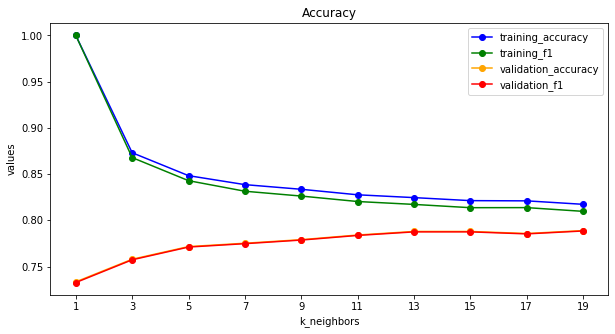

In [114]:
#here we use validation set to determine the hyper-parameter k

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
k_neighbors = []
for k in range(1,20,2):
    model = KNeighborsClassifier(n_neighbors=k, weights='uniform', p = 1)
    model.fit(stratified_train, y_train)
    y_pred_train = model.predict(stratified_train)
    training_accuracy.append(accuracy_score(y_pred_train, y_train))
    val_accuracy.append(cross_val_score(model, stratified_train, y_train, scoring= 'accuracy', cv = 5).mean())
    training_f1.append(f1_score(y_pred_train, y_train))
    val_f1.append(cross_val_score(model, stratified_train, y_train, scoring= 'f1_macro', cv = 5).mean())
    k_neighbors.append(k)

plt.subplots(figsize = (10,5))
plt.plot(k_neighbors, training_accuracy, '-ok', label = 'training_accuracy', color = 'blue')
plt.plot(k_neighbors, training_f1,'-ok', label = 'training_f1', color = 'green')
plt.plot(k_neighbors, val_accuracy,'-ok', label = 'validation_accuracy', color = 'orange')
plt.plot(k_neighbors, val_f1,'-ok', label = 'validation_f1', color = 'red')
plt.title('Accuracy')
plt.xlabel("k_neighbors")
plt.ylabel("values")
plt.xticks(k_neighbors)
plt.legend()
plt.show()

In [115]:
#from the graph we saw k = 13 produces the best result

model = KNeighborsClassifier(n_neighbors= 13, weights= 'uniform', p = 1)
model.fit(stratified_train, y_train)
y_pred = model.predict(stratified_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data") 
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8110383536014967
Test F1 Score:  0.7967806841046278
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,942,195,1137
1,209,792,1001
All,1151,987,2138


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

bank_encoded = pd.read_csv('bank_encoded.csv', encoding = "Latin-1")
# Features: first 20 columns
array = bank_encoded.values
X = array[:,0:-1]

# Target variable: 'response_binary'
Y = array[:,-1]
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=7)


In [125]:
from joblib import dump, load
dump(model, 'KNN_model.joblib')
clf = load( 'KNN_model.joblib')

In [126]:
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = clf.score(X,Y)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = clf.predict(X_train)  

Ypredict

Test score: 72.19 %


array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

# Decision tree model

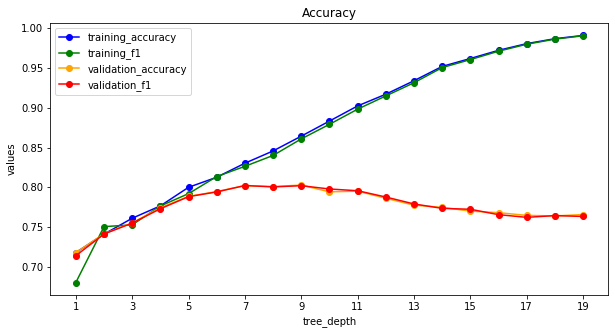

In [127]:
#here we use validation set to determine the best max_depth of the tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(stratified_train,y_train)
    y_training_pred = tree_clf.predict(stratified_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,stratified_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,stratified_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

plt.subplots(figsize = (10,5))
plt.plot(tree_depths, training_accuracy, '-ok', label = 'training_accuracy', color = 'blue')
plt.plot(tree_depths, training_f1,'-ok', label = 'training_f1', color = 'green')
plt.plot(tree_depths, val_accuracy,'-ok', label = 'validation_accuracy', color = 'orange')
plt.plot(tree_depths, val_f1,'-ok', label = 'validation_f1', color = 'red')
plt.title('Accuracy')
plt.xlabel("tree_depth")
plt.ylabel("values")
plt.xticks(k_neighbors)
plt.legend()
plt.show()

In [128]:
# from the graph we saw max_depth = 7 produces the best result

tree_clf = DecisionTreeClassifier(max_depth=7)
tree_clf.fit(stratified_train,y_train)
y_pred = tree_clf.predict(stratified_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8119738072965388
Test F1 Score:  0.8021653543307086
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,921,216,1137
1,186,815,1001
All,1107,1031,2138


In [134]:
from joblib import dump, load
dump(tree_clf, 'DecisionTree_model.joblib')
clf = load('DecisionTree_model.joblib') 


In [135]:
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = clf.score(X,Y)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = clf.predict(X_test)  

Ypredict

Test score: 61.59 %


array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [145]:
import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, feature_names=feature, class_names=['no', 'yes'], filled=True)
graph = graphviz.Source(dot_data, format='png')
graph

ModuleNotFoundError: No module named 'graphviz'

In [137]:
#random forest model

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=7)
rf_clf.fit(stratified_train,y_train)
y_pred = rf_clf.predict(stratified_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,stratified_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,stratified_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8278949228413239
Train Accuracy  0.8291627689429373
Validation Mean F1 Score:  0.8098563793110083
Validation Mean Accuracy:  0.8124427081731213


In [138]:
y_pred = rf_clf.predict(stratified_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8217960710944808
Test F1 Score:  0.8167388167388168
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,908,229,1137
1,152,849,1001
All,1060,1078,2138


In [139]:
from joblib import dump, load
dump(rf_clf, 'RandomForest_model.joblib')
clf = load('RandomForest_model.joblib') 
clf.score(X_test,Y_test)

0.5973560385390992

# ML models for imbalanced dataset

In [141]:
# encode dataset

imb_df = preprocessing(bank_full_df)
imb_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,1.304196,1.038375,0.740629,-0.545735,0.134849,0.255437,-0.899113,0.437121,0.263922,-1.299792,0.974767,0.347957,-0.570794,-0.253692,0
1,-0.047525,-2.314090,0.740629,0.811713,0.134849,-0.446562,-0.899113,-2.287696,0.263922,-1.299792,0.974767,-1.272066,-0.570794,-0.253692,0
2,-0.047525,0.293383,0.740629,0.811713,0.134849,0.046575,-0.899113,0.437121,0.263922,-1.299792,0.974767,-1.272066,-0.570794,-0.253692,0
3,-0.047525,0.293383,-0.702470,0.811713,0.134849,-0.446890,1.112207,0.437121,0.263922,-1.299792,0.974767,0.347957,-0.570794,-0.253692,0
4,-0.047525,1.038375,0.740629,-0.545735,0.134849,-0.371477,-0.899113,0.437121,0.263922,-1.299792,0.974767,-0.462055,-0.570794,-0.253692,0


# 1. KNN model

In [142]:
from sklearn.model_selection import train_test_split
X_imb = imb_df.drop(columns = 'y')
y_imb = imb_df.y
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb, y_imb, test_size = 0.2, random_state = 42)

knn_imb = KNeighborsClassifier(n_neighbors =5, weights= 'uniform', p =1)
knn_imb.fit(X_train_imb, y_train_imb)
y_pred_imb = model.predict(X_test_imb)

print("Test Accuracy: ",accuracy_score(y_test_imb,y_pred_imb))
print("Test F1 Score: ",f1_score(y_test_imb,y_pred_imb))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test_imb, y_pred_imb, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7240645305848085
Test F1 Score:  0.43366291101402615
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,5520,2353,7873
1,110,943,1053
All,5630,3296,8926


# 2. Decision tree model

In [85]:
tree_clf_imb = DecisionTreeClassifier(max_depth=7)
tree_clf_imb.fit(X_train_imb,y_train_imb)
y_pred_imb = tree_clf_imb.predict(X_test_imb)
print("Test Accuracy: ",accuracy_score(y_test_imb,y_pred_imb))
print("Test F1 Score: ",f1_score(y_test_imb,y_pred_imb))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test_imb, y_pred_imb, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8915958873491283
Test F1 Score:  0.41776710684273716
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,7630,248,7878
1,722,348,1070
All,8352,596,8948


In [97]:
rf_clf_imb = RandomForestClassifier(max_depth=7)
rf_clf_imb.fit(X_train_imb,y_train_imb)
y_pred = rf_clf.predict(X_test_imb)
print("Test Accuracy: ",accuracy_score(y_test_imb,y_pred_imb))
print("Test F1 Score: ",f1_score(y_test_imb,y_pred_imb))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test_imb, y_pred_imb, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8915958873491283
Test F1 Score:  0.41776710684273716
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,7630,248,7878
1,722,348,1070
All,8352,596,8948


In [63]:
class KNeighborClassifier:
    def __init__(self, n_neighbor = 5, p = 2):
        self.n_neighbor = n_neighbor
        self.p = p
    def euclidian_distance(self, arr1, arr2):
        s = 0
        for i in range(len(arr1)):
            s += (abs(arr1[i] - arr2[i]))**(self.p)
        return s ** (1/float(self.p))
    def fit(self, X, y):
        self.X = X
        self.y = y
    def k_neighbor(self, arr):
        neighbor = []
        for i in range(len(self.X)):
            neighbor.append([self.euclidian_distance(self.X[i], arr), i])
        neighbor = sorted(neighbor, key = lambda x : x[0])
        k_neighbor = []
        for i in range(self.n_neighbor):
            k_neighbor.append(neighbor[i][1])
        return k_neighbor
    def p(self, arr):
        k_neighbor = self.k_neighbor(arr)
        count_yes = 0
        count_no = 0
        for i in k_neighbor:
            if self.y[i] == 1:
                count_yes += 1
            else:
                count_no += 1
        if count_yes >= count_no:
            return 1
        else:
            return 0
    def predict(self, arr):
        if len(arr.shape) == 1:
            return [self.p(arr)]
        else:
            predict_arr = []
            for record in arr:
                k_neighbor = self.k_neighbor(record)
                count_yes = 0
                count_no = 0
                for i in k_neighbor:
                    if self.y[i] == 1:
                        count_yes += 1
                    else:
                        count_no += 1
                if count_yes >= count_no:
                    predict_arr.append(1) 
                else:
                    predict_arr.append(0)
            return predict_arr
    def accuracy_score(self, arr1, arr2):
        matched = 0
        for i in range(len(arr1)):
            if arr1[i] == arr2[i]:
                matched += 1
        return matched/len(arr1)
  

In [64]:
knn = KNeighborClassifier(n_neighbor=15, p=1)
knn.fit(stratified_train.values, y_train.values)
y_pred1 = knn.predict(stratified_test.values)

In [ ]:
knn.accuracy_score(y_pred1, y_test.values)